# Day1課題
car-consumeの線形回帰を行う。

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数

## 1. データの読み込み 

In [2]:
df_car_consume = pd.read_csv("car-consume/measurements.csv")[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters', 'refill gas']]

# データ
display(df_car_consume.head())

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [3]:
df_car_consume.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


## 2. データの整理

* 課題  
 1. describeが一部しか出ない  
 データの形式が怪しい気がする→「,」が含まれている。小数点のつもりのようだ。
 2. 数値でないデータがある  
 ダミー変数を使う

### 2-1. 小数点の整形

In [4]:
# 型確認
print(type(df_car_consume['distance'][0]))

<class 'str'>


In [5]:
# 文字列リプレイス
df_car_consume['distance'] = df_car_consume['distance'].str.replace(',', '.')
df_car_consume['consume'] = df_car_consume['consume'].str.replace(',', '.')
df_car_consume['temp_inside'] = df_car_consume['temp_inside'].str.replace(',', '.')
df_car_consume['refill liters'] = df_car_consume['refill liters'].str.replace(',', '.')
# 数値にする
df_car_consume['distance'] = df_car_consume['distance'].astype(float)
df_car_consume['consume'] = df_car_consume['consume'].astype(float)
df_car_consume['temp_inside'] = df_car_consume['temp_inside'].astype(float)
df_car_consume['refill liters'] = df_car_consume['refill liters'].astype(float)

In [6]:
display(df_car_consume.head())

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [7]:
df_car_consume.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


describeを表示できた。  
distanceのmaxがおかしいが、Day2以降でデータを整理すると思うのでそのままにしておく。

### 2-2.ダミー変数の利用

In [8]:
# ダミーと交換
# df_car_consume['gas_type'] = df_car_consume['gas_type'].map({'E10': 0, 'SP98': 1})
# df_car_consume['specials'] = df_car_consume['specials'].map({'' : 0,'AC rain' : 1,'AC' : 2,'rain' : 3,'snow' : 4,'AC snow' : 5,'half rain half sun' : 6,'sun' : 7,'AC sun' : 8,'sun ac' : 9})
# df_car_consume['refill gas'] = df_car_consume['refill gas'].map({'E10': 0, 'SP98': 1})

# ダミーと交換 ver.2
# カテゴリ値に変換
labels, uniques = pd.factorize(df_car_consume['gas_type'])
df_car_consume['gas_type'] = labels

labels, uniques = pd.factorize(df_car_consume['specials'])
df_car_consume['specials'] = labels

labels, uniques = pd.factorize(df_car_consume['refill gas'])
df_car_consume['refill gas'] = labels

# refill litersの欠損は給油無として0埋め
df_car_consume['refill liters'] = df_car_consume['refill liters'].fillna(0)
# temp_insideの欠損はオープンカーということにしてtemp_outside代入
df_car_consume['temp_inside'] = df_car_consume['temp_inside'].fillna(df_car_consume['temp_outside'])

display(df_car_consume.head())

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,-1,0,0,0,0,45.0,0
1,12.0,4.2,30,21.5,13,-1,0,0,0,0,0.0,-1
2,11.2,5.5,38,21.5,15,-1,0,0,0,0,0.0,-1
3,12.9,3.9,36,21.5,14,-1,0,0,0,0,0.0,-1
4,18.5,4.5,46,21.5,15,-1,0,0,0,0,0.0,-1


変換できた。  
~~今回は列ごとに含まれているものを自分で探したので自動で0から振ってくれる機能があればうれしい。。~~  
→他の人の提出分から真似してver.2にしました。

* 残課題  
  1.給油の種類と給油の量は関係があると思うのでくっつけて一つの項目にしたかった  
  2.ダミーを使うと項目が増えるのと、項目ごとのつながりがなくなって独立してしまう気がしたので使っていない。  
  　使い分けを知りたい

## 3. データの分析

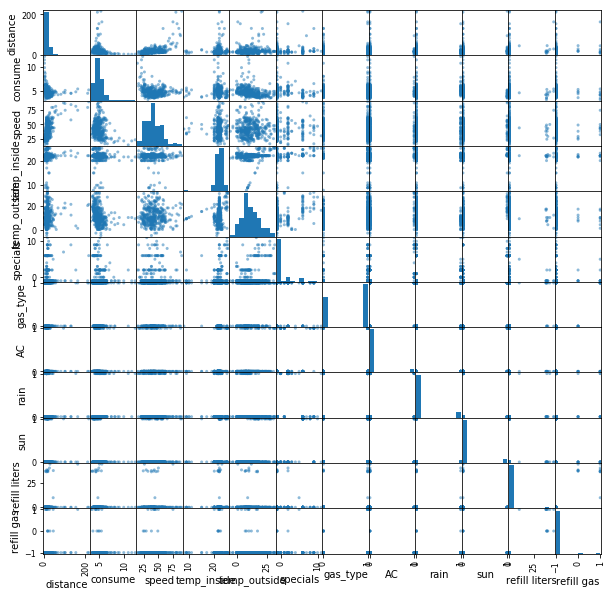

In [9]:
# 散布図行列
pd.plotting.scatter_matrix(df_car_consume, figsize=(10,10))
plt.show()

In [10]:
# 相関係数を確認
df_car_consume.corr()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
distance,1.000000,-0.128967,0.562299,0.072861,0.088175,0.108496,-0.053411,-0.025738,-0.019791,0.081120,0.107045,0.108890
consume,-0.128967,1.000000,-0.227866,-0.035716,-0.320811,-0.081323,-0.015327,0.096591,0.248118,-0.170667,-0.074095,-0.083470
speed,0.562299,-0.227866,1.000000,0.026292,0.015411,0.061486,-0.097360,-0.035408,0.009489,0.081618,-0.007446,0.015927
temp_inside,0.072861,-0.035716,0.026292,1.000000,0.189519,0.210888,-0.063965,0.182160,-0.010193,0.127052,0.016573,0.015975
temp_outside,0.088175,-0.320811,0.015411,0.189519,1.000000,0.330275,0.148705,0.167562,-0.186315,0.346903,-0.041595,-0.044342
specials,0.108496,-0.081323,0.061486,0.210888,0.330275,1.000000,0.074513,0.442619,0.250439,0.716271,-0.041553,-0.014103
gas_type,-0.053411,-0.015327,-0.097360,-0.063965,0.148705,0.074513,1.000000,0.105285,0.060328,0.022761,0.000741,0.063026
AC,-0.025738,0.096591,-0.035408,0.182160,0.167562,0.442619,0.105285,1.000000,0.242915,0.088598,-0.052571,-0.051534
rain,-0.019791,0.248118,0.009489,-0.010193,-0.186315,0.250439,0.060328,0.242915,1.000000,-0.112650,0.033505,0.061846
sun,0.081120,-0.170667,0.081618,0.127052,0.346903,0.716271,0.022761,0.088598,-0.112650,1.000000,-0.054448,-0.053374


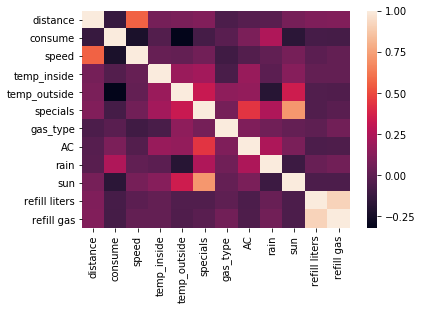

In [11]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_car_consume.corr())
plt.show()

## 4. 学習

In [12]:
# 係数を求める
y = df_car_consume["consume"].values
X = df_car_consume[['distance', 'speed', 'temp_inside', 'temp_outside', 'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters', 'refill gas']].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

# 重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]
w4 = regr.coef_[3]
w5 = regr.coef_[4]
w6 = regr.coef_[5]
w7 = regr.coef_[6]
w8 = regr.coef_[7]
w9 = regr.coef_[8]
w10 = regr.coef_[9]
w11 = regr.coef_[10]

In [13]:
x1 = df_car_consume['distance'].values
x2 = df_car_consume['speed'].values
x3 = df_car_consume['temp_inside'].values
x4 = df_car_consume['temp_outside'].values
x5 = df_car_consume['specials'].values
x6 = df_car_consume['gas_type'].values
x7 = df_car_consume['AC'].values
x8 = df_car_consume['rain'].values
x9 = df_car_consume['sun'].values
x10 = df_car_consume['refill liters'].values
x11 = df_car_consume['refill gas'].values

# 重みと二乗誤差の確認
y_est = w0 + w1 * x1 + w2 * x2 + w3 * x3 + w4 * x4 + w5 * x5 + w6 * x6 + w7 * x7 + w8 * x8 + w9 * x9 + w10 * x10 # w11 * x11
squared_error = 0.5 * np.sum((y - y_est) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}, w6 = {:.3f}, w7 = {:.3f}, w8 = {:.3f}, w9 = {:.3f}, w10 = {:.3f}, w11 = {:.3f}'.format(w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11))
print('二乗誤差 = {:.3f}'.format(squared_error))

w0 = 5.501, w1 = 0.003, w2 = -0.019, w3 = 0.010, w4 = -0.042, w5 = -0.044, w6 = -0.009, w7 = 0.482, w8 = 0.644, w9 = 0.099, w10 = -0.002, w11 = -0.325
二乗誤差 = 182.111


## 5. モデルの評価

In [14]:
# 値を予測
y_pred = regr.predict(X)

# MSEを計算
mse = mean_squared_error(y, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

MSE = 0.834
MAE = 0.612
RMSE = 0.913
